
# Project: Investigate a Dataset (Non Show Appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will investigate a dataset which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

+ **‘ScheduledDay’** tells us on what day the patient set up their appointment.
+ **‘Neighborhood’** indicates the location of the hospital.
+ **‘Scholarship’** indicates whether the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) or not.

We will be looking for trends and relation between the different variables in this dataset, to see if there are any characteristics associated with the two groups of patients(those who showed up and those who did not show up to their appointments).

The questions we will investigate are:
1. How many people showed up to the appointment?
2. Is the age correlated with the show up variable?
3. Is the fact of being receiving and Scholarship influencing the attendance?
4. Is there a relation between No Showing up and receiving or not an SMS?
5. Are there more Female or Male who showed up?
6. How is the relation between age and days of difference between the scheduled day and the appointment day?

You can find our conclusion at the bottom! 


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### I will investigate a bit my Data Frame by using some functions, as: 
+ shape
+ Info
+ Looking for duplicates: sum(duplicated)
+ Some statistic as the mean, max and min values, quartiles, etc.
+ Histogram to have a visualization of my data. 

Let's go!

In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
sum(df.duplicated())

0

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**UPS!**  I can see there is a minimum value in Age for -1 years old... I will investigate how many negatives values there are for age. Then consider them as Human Errors when typing, and delete them...

In [8]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We just found 1 row with a negative value for Age, so I will just drop it down in the cleaning phase.

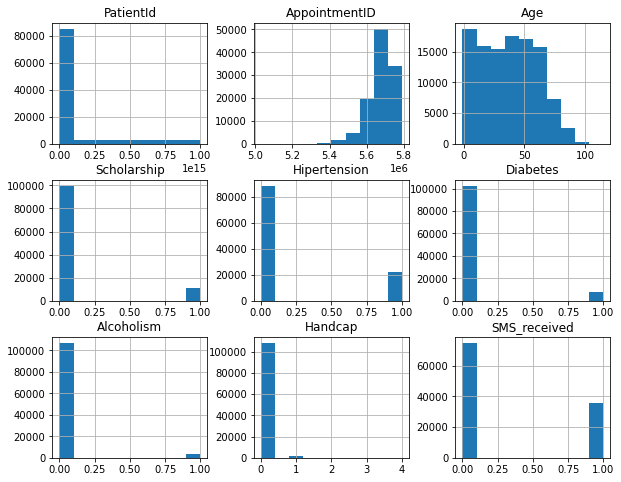

In [9]:
df.hist(figsize=(10,8));

# Data Cleaning 

### Dropping a Row:

As mentioned before, I will drop the row with an age of -1, so it won't make the result confusing. 
I will also run the min and shape function to be sure it worked. 

In [10]:
df.drop(df[df["Age"]== -1].index, inplace=True)
df.Age.min()


0

In [11]:
df.shape

(110526, 14)

### Converting Types of Columns: 

I first will **convert** Schedule day and Appointments Day **to Date format**, since they are in Object(str) format, so I will be able to operate with them later on

In [12]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

### Now, I will create 2 new columns:
+ **'just_appmt_date** with just the date, not the time for ScheduledDay Datetime column
+ **'just_sched_date'** with just the date, not the time for AppointmentDay Datetime column

This is necessary in order to do the next step: creating a new column with the difference in days for these 2 dates. If you look closer, the ScheduledDay column have Time details (hour, minute and seconds where the consult was realized), while for the AppointmentDay Column have just the date(year, month and day) with the Time values settle all in 0. 

I still want to keep the original columns in order to do not lose information about the time in ScheduledDay column. 


In [13]:
df['just_sched_date'] = df['ScheduledDay'].dt.date
df['just_appmt_date'] = df['AppointmentDay'].dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,just_sched_date,just_appmt_date
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


### Create new column:

I will now **create a new column**, 'Schedule_Appnt_Diff', to see how many days were between both dates.
For this I used the new created columns with no Time on them. The reason is to avoid negative days coming from booking made the same day as the appointment day. 

The information in this new column could be analyzed later to see if there is any relation with other variables.


In [14]:
 
df['Schedule_Appnt_Diff']= df['just_appmt_date']-df['just_sched_date']
df['Schedule_Appnt_Diff'].astype(np.int64)

df.Schedule_Appnt_Diff.describe()


count                        110526
mean     10 days 04:24:39.789370826
std      15 days 06:07:14.979140739
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: Schedule_Appnt_Diff, dtype: object

### Change column name: 

I just saw that the column "No-show" has a '-' in between the name, instead of an underscored, '_'.
I will change it so it will give no error when I use it while coding. 

In [15]:
df.rename(columns = {"No-show":"No_show"}, inplace= True)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,just_sched_date,just_appmt_date,Schedule_Appnt_Diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0 days


<a id='eda'></a>
## Exploratory Data Analysis

The main goal of this exersice is to analyse *what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?*

This can be shown in the Column 'No_show', where a **No** means the person showed up for the appointment, and a **Yes** means the person did not showed up for the scheduled appointment



### Research Question 1: how many people showed up to the appointment?

To do so, we will create a mask for each group we want to explore. 

Here we can see that there are more people who showed up than those who did not show up. In the graph below, the **False** value, stand for those who **showed up**, so I changed them with a label to be more clear. 

In [16]:
showed_up = df.No_show == 'No'
no_showed_up = df.No_show == 'Yes'

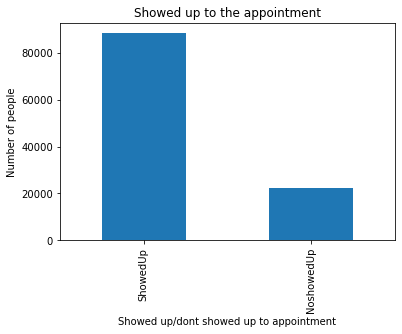

In [17]:
showed_up.value_counts().plot(kind='bar')
no_showed_up.value_counts().plot(kind='bar')
plt.xlabel('Showed up/dont showed up to appointment')
plt.ylabel('Number of people')
plt.title('Showed up to the appointment')
plt.xticks(np.arange(2), ('ShowedUp','NoshowedUp'));

### Research Question 2: Is the age correlated with the show up variable?

We will consider the mean age of both groups. 

Seems the average age for both groups are similar,37years old for those who show up and 34 years old for those who didn't, and there is not a big difference in the distribution of this variable


In [18]:
df.Age[showed_up].mean()

37.790504154999034

In [19]:
df.Age[no_showed_up].mean()

34.31766656212196

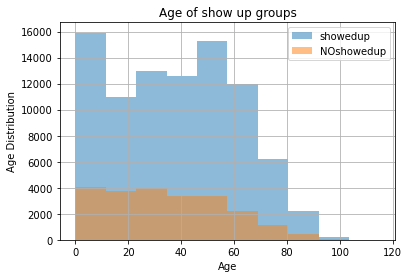

In [20]:
df.Age[showed_up].hist(alpha=0.5, label= "showedup")
df.Age[no_showed_up].hist(alpha=0.5, label= "NOshowedup")
plt.legend()
plt.xlabel('Age')
plt.ylabel('Age Distribution')
plt.title('Age of show up groups');

### Research Question 3: Is the fact of being receiving and Scholarship influencing the attendance?

I did this analysis using different graphs and description of the information, in order to make it more clear. 

1. I created a mask for people receiving a scholarship and those who did not receive one.
2. This analysis showed that 99,665 persons are **Not receiving** a scholarship, while 10861 **Are receiving** one. 

In [22]:
scholarship= df.Scholarship == 1
no_scholarship = df.Scholarship == 0
scholarship.value_counts()


False    99665
True     10861
Name: Scholarship, dtype: int64

In [23]:
no_scholarship.value_counts()

True     99665
False    10861
Name: Scholarship, dtype: int64

3. 3.I created a histogram for the two previous groups (receiving or not a scholarship) and the variable No Show to an appointment. It seems the percentage is the same in both groups.

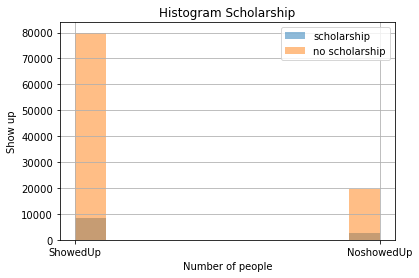

In [24]:
df.No_show[scholarship].hist(alpha=0.5, label= "scholarship");
df.No_show[no_scholarship].hist(alpha=0.5, label= "no scholarship")
plt.legend()
plt.xticks(np.arange(2), ('ShowedUp','NoshowedUp'))
plt.xlabel('Number of people')
plt.ylabel('Show up')
plt.title('Histogram Scholarship');

4. 4.Just to see the percentage more in detail, I have counted the numbers of Non shows (Yes) and Shows (No) for both groups (receiving or not a scholarship), and we can see that they are very similar, but the numbers are much larger in the People who showed to their appointments. 

In [25]:
df.No_show[scholarship].value_counts()

No     8283
Yes    2578
Name: No_show, dtype: int64

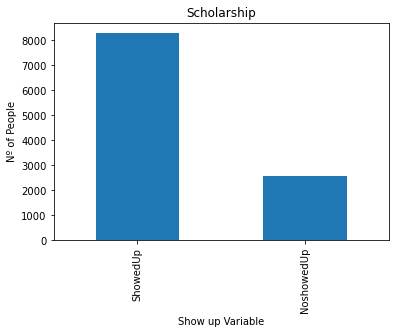

In [27]:
df.No_show[scholarship].value_counts().plot(kind='bar')
plt.title('Scholarship')
plt.xticks(np.arange(2), ('ShowedUp','NoshowedUp'))
plt.xlabel('Show up Variable')
plt.ylabel('Nº of People');

In [28]:
df.No_show[no_scholarship].value_counts()

No     79924
Yes    19741
Name: No_show, dtype: int64

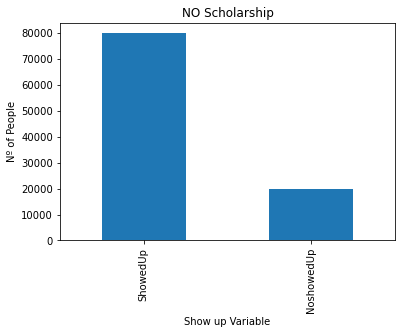

In [29]:
df.No_show[no_scholarship].value_counts().plot(kind='bar')
plt.title('NO Scholarship')
plt.xticks(np.arange(2), ('ShowedUp','NoshowedUp'))
plt.xlabel('Show up Variable')
plt.ylabel('Nº of People');

In [30]:
df.No_show[no_scholarship].describe()

count     99665
unique        2
top          No
freq      79924
Name: No_show, dtype: object

### Research Question 4: Relation between No Show and the rest of the variables

Note that we could do the same analysis for those other variables: 
+ Hypertension
+ Diabetes
+ Alcoholism
+ Handicap
+ SMS_received

I will make just one more example:

### Relation between No Showing up and receiving or not an SMS:

Here we can see that more than half of the people who did not receive an SMS Showed up to their appointment, while less than  half of the people who did receive an SMS did not show to the appointment.

We can not extract the conclusion that was the fact of sending the SMS the reason to Don't show to the appointment, since can be many more variables or another reasons under this fact. 

In [31]:
sms= df.SMS_received == 1
no_sms = df.SMS_received == 0
sms.value_counts()

False    75044
True     35482
Name: SMS_received, dtype: int64

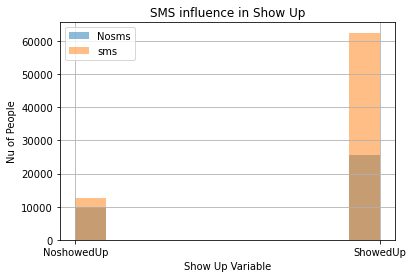

In [32]:
df.No_show[sms].hist(alpha=0.5, label= "Nosms");
df.No_show[no_sms].hist(alpha=0.5, label= "sms")
plt.legend()
plt.xticks(np.arange(2), ('NoshowedUp','ShowedUp'))
plt.xlabel('Show Up Variable')
plt.ylabel('Nu of People')
plt.title('SMS influence in Show Up');

In [33]:
df.No_show[sms].value_counts()

No     25698
Yes     9784
Name: No_show, dtype: int64

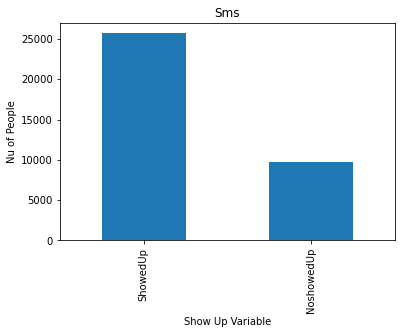

In [35]:
df.No_show[sms].value_counts().plot(kind='bar')
plt.title('Sms')
plt.xticks(np.arange(2), ('ShowedUp','NoshowedUp'))
plt.xlabel('Show Up Variable')
plt.ylabel('Nu of People');

In [36]:
df.No_show[no_sms].value_counts()

No     62509
Yes    12535
Name: No_show, dtype: int64

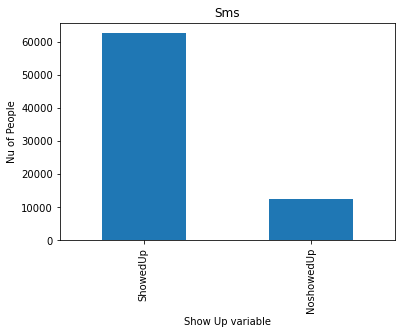

In [37]:
df.No_show[no_sms].value_counts().plot(kind='bar')
plt.title('Sms')
plt.xticks(np.arange(2), ('ShowedUp','NoshowedUp'))
plt.xlabel('Show Up variable')
plt.ylabel('Nu of People');

### Research Question 5: Are there more Female or Male who showed up?
 We can see that the percentage for both categories is very similar in Males and Females. 
 Also, we can see that there is a larger number of females than males in the data file. 


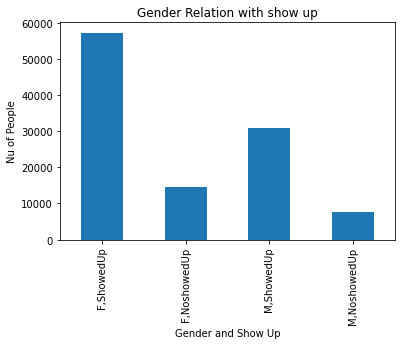

In [38]:
df.groupby('Gender').No_show.value_counts().plot(kind='bar')
plt.xticks(np.arange(4), ('F,ShowedUp','F,NoshowedUp','M,ShowedUp','M,NoshowedUp'))
plt.xlabel('Gender and Show Up')
plt.ylabel('Nu of People')
plt.title('Gender Relation with show up');

### Research Question 6: How is the relation between age and days of difference between the scheduled day and the appointment day?

Even if this graph is overload, we can see that for the youngest people (quartile 2 of the distribution) the difference between scheduled day and appointment day is very homogeneous in all the distribution (between -6 and 179 days of difference).

As people get older, the difference is more probable between 40 and 90 days.

For very big differences, over 100 days, we just find people in the Quartile 1 of the Age distribution. 

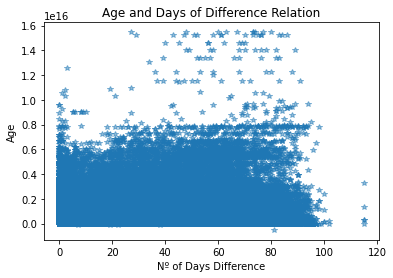

In [39]:
plt.plot(df['Age'],df['Schedule_Appnt_Diff'],'*', alpha=0.5)
plt.xlabel('Nº of Days Difference')
plt.ylabel('Age')
plt.title('Age and Days of Difference Relation');

<a id='conclusions'></a>
## Conclusions

We were looking for trends and relation between the different variables in this dataset, to see if there are any characteristics associated with the two groups of patients(those who showed up and those who did not show up to their appointments).

After all the analysis we did, we can summarize the conclusion we were finding along the way: 

+ There are more people who showed up than those who did not show up
+ The average age for people who show up or not, are similar
+ Analyzing Scholarships, we found that just 9% of people are receiving one. For the relation with the variable No Show to an appointment seems that the percentage is very similar in both groups.
+ 65% of people did not receive an SMS, but more than half of them show up to their appointment. While for the 35% who did receive, more than did not show up to the appointment. 
+ There is a larger number of females than males in the data file, but the percentage for both categories, show up/Do Not show up,  is very similar in Males and Females. 

+ For the youngest people (quartile 2 of the distribution) the difference between scheduled day and appointment day is very homogeneous in all the distribution (between -6 and 179 days of difference). As people get older, the difference is more probable between 40 and 90 days. For very big differences, over 100 days, we just find people in the Quartile 1 of the Age distribution.

The **LIMITATIONS** of this database were:

+ Too many different entries for the Neighbourhood variable, so making analysis with it was difficult. Plotting was not an option. 
+ The data type for some variables were wrong and difficult to work with (scheduled day and appointment day eg)
+ Some data out of range(as negative for Age or difference between scheduled day and appointment day)

I hope this was clear for you! 


### Repositories:
During my analysis I used mainly Stack Overflow and https://matplotlib.org/ to solve some dudes and to enquire new ways of doing things. 